<h2>k-Means, Hiearchical, DBSCAN, Gaussian Mixture Models, Mean Shift</h2>

<h3>k-Means Clustering -- Most Common</h3>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv('datasets/SampleSuperstore.csv')
df.drop(columns=['Country'], inplace=True) # only US in the dataset
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
features = df[['Sales', 'Quantity', 'Discount', 'Profit']]

scaler = StandardScaler() # transforms features like z = (x - mu)/sigma, where mu is mean of the feature and sigma is the standard deviation
X_scaled = scaler.fit_transform(features)

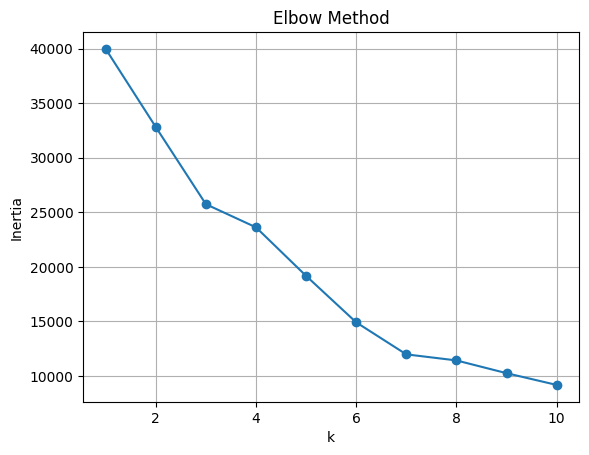

In [8]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_) # Inertia = Sum of Squared Distances of samples to their closest cluster center

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [9]:
# Apply KMeans with chosen k (ex. k=6 based on elbow which is used here, can be experimented with)
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [10]:
df['Cluster'].value_counts()

Cluster
4    3825
0    3314
2    1904
5     913
1      25
3      13
Name: count, dtype: int64

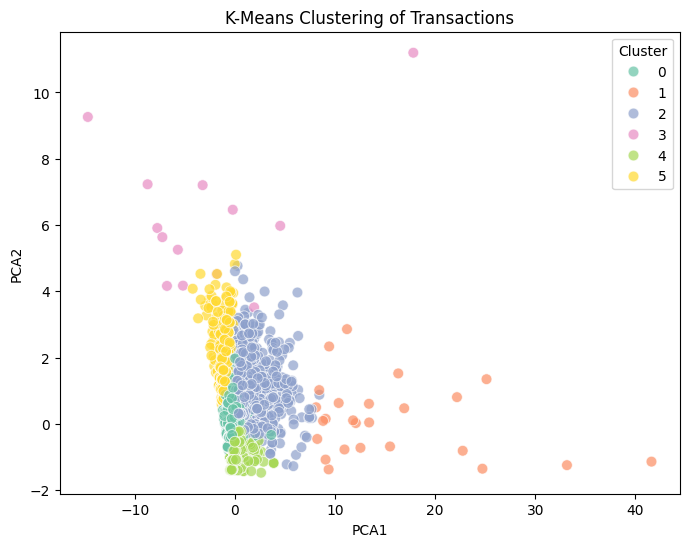

In [11]:
# Since K-Means operates in n-dimensional space, we reduce it to 2D with PCA to plot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=60,
    alpha=0.7
)
plt.title("K-Means Clustering of Transactions")
plt.show()

In [12]:
df.groupby('Cluster')[['Sales', 'Quantity', 'Discount', 'Profit']].mean().round(2)

,Sales,Quantity,Discount,Profit
Cluster,,,,
0,157.12,2.84,0.22,5.35
1,7212.50,5.08,0.06,2842.35
2,518.45,7.20,0.10,91.19
3,5105.75,6.15,0.60,-2692.14
4,120.85,2.88,0.00,33.57
5,88.12,3.88,0.70,-76.06


<img src="https://jafardigital.com/5/ml/cluster_breakdown.png"/>

<h3>💡 Practical Takeaways:</h3>

🔴 Cluster 3 – Danger Zone

    ⚠️ High sales + high discounts = heavy losses

    📉 Likely campaign mistakes, fraud, or high return rate

    🛑 Audit these transactions

🟣 Cluster 1 – Super Customers

    🚀 High revenue + high profit + low discount

    🏆 Retain, reward, or prioritize

    🎯 Consider loyalty incentives

🟠 Cluster 5 – Loss from Tiny Orders

    ❌ Small value, high discount, negative profit

    🧹 Clean up marketing offers or threshold pricing

🔵 Cluster 2 – Bulk Profitable

    📦 Possibly small business clients or wholesalers

    📈 Optimize for volume + upsell potential

🟡 Cluster 4 – Small but Reliable

    ✅ Good net profit without discounts

    💡 Possibly loyal individual customers

    📬 Consider personalized email follow-up

🟢 Cluster 0 – Ordinary Orders

    🤷‍♂️ Low sales + low profit = not worth special focus

    🔁 But can try bundling or upsell campaigns

Here, I will limit to using the same dataset so that we do not repeat the same steps of loading, cleaning, scaling, etc

<h3>Hiearchical Clustering</h3>

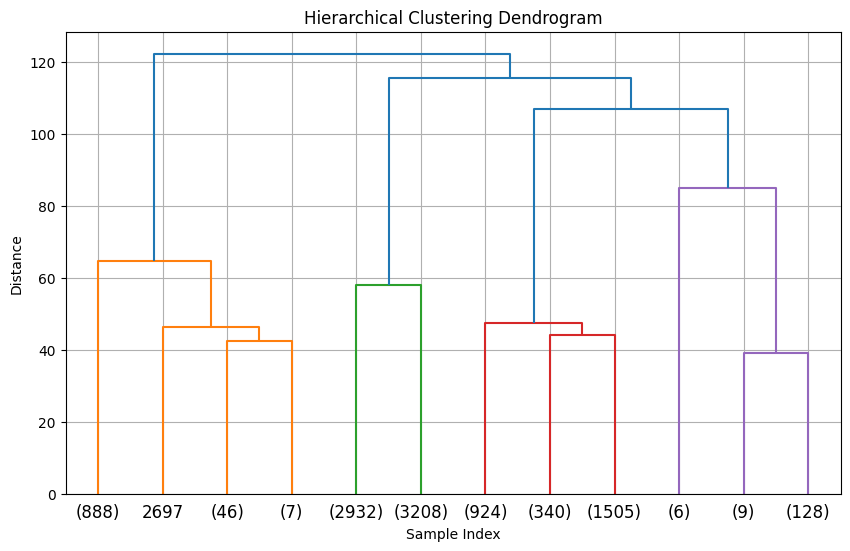

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

<h3>DBSCAN</h3>

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=10)  # You can tune eps
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

<h3>Gaussian Mixture Models</h3>

In [18]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
df['GMM_Cluster'] = gmm_labels

<h3>Mean Shift</h3>

In [19]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms_labels = ms.fit_predict(X_scaled)
df['MeanShift_Cluster'] = ms_labels

<h3>All-In-One Visualisation</h3>

/tmp/ipykernel_38341/2950462523.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


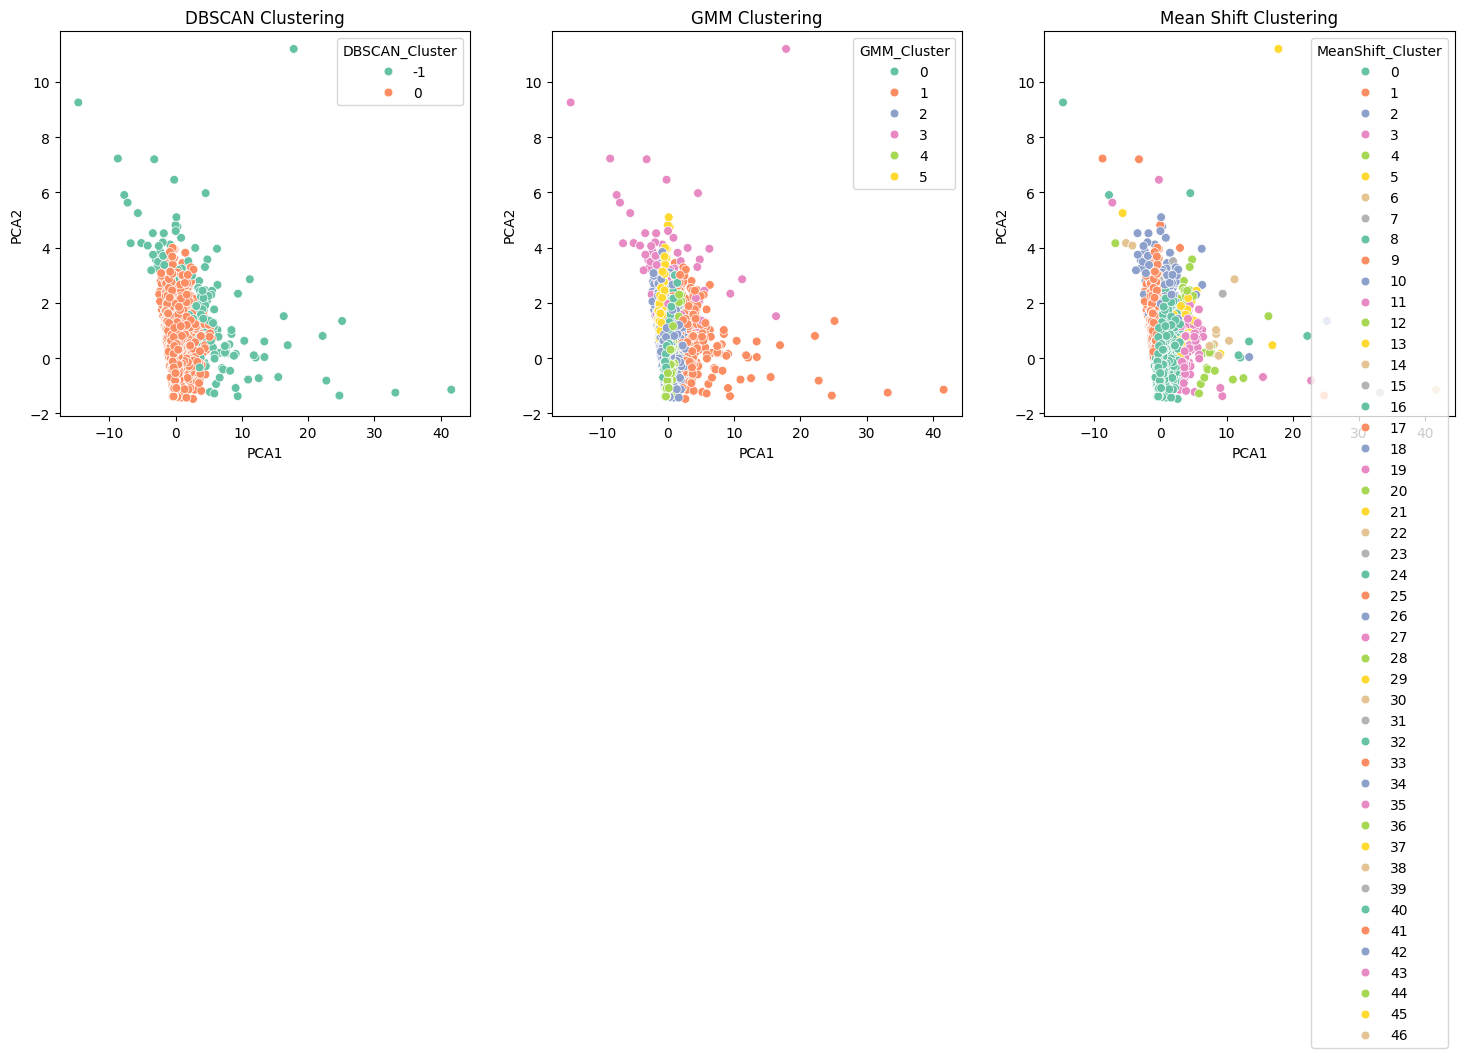

In [20]:
# 1. Run PCA once
X_pca = PCA(n_components=2).fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# 2. Prepare cluster types to plot
cluster_methods = {
    'DBSCAN_Cluster': 'DBSCAN',
    'GMM_Cluster': 'GMM',
    'MeanShift_Cluster': 'Mean Shift'
}

# 3. Plot side-by-side clustering results
plt.figure(figsize=(18, 5))
for i, (col, title) in enumerate(cluster_methods.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue=col, palette='Set2', legend='brief', s=40)
    plt.title(f"{title} Clustering")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")

plt.tight_layout()
plt.show()

In [21]:
# Show feature means per cluster
for col in cluster_methods.keys():
    print(f"\n--- {cluster_methods[col]}: Cluster Means ---")
    display(df.groupby(col)[['Sales', 'Quantity', 'Discount', 'Profit']].mean().round(2))

    print(f"\n--- {cluster_methods[col]}: Cluster Counts ---")
    display(df[col].value_counts())


--- DBSCAN: Cluster Means ---


,Sales,Quantity,Discount,Profit
DBSCAN_Cluster,,,,
-1,3213.19,6.74,0.26,329.08
0,177.92,3.74,0.15,23.43



--- DBSCAN: Cluster Counts ---


DBSCAN_Cluster
 0    9823
-1     171
Name: count, dtype: int64


--- GMM: Cluster Means ---


,Sales,Quantity,Discount,Profit
GMM_Cluster,,,,
0,85.11,3.56,0.20,10.70
1,2282.69,6.81,0.08,655.54
2,528.25,4.07,0.23,26.71
3,2401.84,6.16,0.48,-715.18
4,87.88,3.63,0.00,27.29
5,14.32,3.75,0.72,-12.77



--- GMM: Cluster Counts ---


GMM_Cluster
4    4225
0    3162
2    1558
5     693
1     262
3      94
Name: count, dtype: int64


--- Mean Shift: Cluster Means ---


,Sales,Quantity,Discount,Profit
MeanShift_Cluster,,,,
0,167.28,3.67,0.09,29.09
1,95.21,3.69,0.65,-49.69
2,797.75,5.76,0.67,-735.56
3,2091.03,6.30,0.04,656.41
4,2942.32,5.30,0.00,1402.88
5,3411.41,6.90,0.12,253.05
6,4322.88,5.40,0.08,1253.97
7,1404.94,6.73,0.41,-599.48
8,5066.59,7.67,0.00,2431.96



--- Mean Shift: Cluster Counts ---


MeanShift_Cluster
0     8614
1     1056
3       93
42      55
2       33
10      25
37      20
12      17
7       11
5       10
4       10
6        5
34       3
8        3
9        3
11       2
28       2
46       2
30       2
22       1
29       1
26       1
15       1
14       1
33       1
32       1
36       1
21       1
18       1
35       1
45       1
40       1
43       1
20       1
17       1
39       1
19       1
44       1
13       1
16       1
23       1
31       1
25       1
27       1
24       1
38       1
41       1
Name: count, dtype: int64

<h3>🧠 Key Insights from Clustering Models</h3>

Across all models, a few clear patterns emerged:

    A small group of transactions consistently shows high profit with low discounts: these are top-tier, high-value customers or large efficient orders. They stand out sharply in GMM (cluster 1) and MeanShift (clusters 4, 6, 8, 11). These are ideal targets for loyalty, upsell, or premium service strategies.
    
    Multiple clusters show loss-making behavior linked to high discounts, especially in MeanShift clusters 1 and 2 and GMM clusters 3 and 5. These likely represent misconfigured promotions or inefficient small orders that hurt profitability. They should be audited and restricted.
    
    DBSCAN uncovered a dense core of normal activity, but more interestingly, it detected outliers with very high value. These are worth reviewing one by one: they could be exceptional clients, risky behavior, or rare cases that don't fit usual patterns.
    
    Hierarchical clustering confirms that data naturally splits into 4–5 meaningful segments, with finer sub-groups. This supports the idea of multi-tiered customer strategies.

Each method gave a different lens but they agree on one thing: the business has a few exceptional performers, some costly leaks, and a large middle.